# Module 6 : Performance measurements of Naive Bayes

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = pd.read_csv("alzheimer.csv")

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [6]:
df.rename(columns={"M/F":"GENDER"}, inplace=True)

In [7]:
df["Group"] = df['Group'].map({"Nondemented":"Nondemented", "Demented":"Demented", "Converted":"Demented"})

In [8]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [9]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['GENDER']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [10]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Group', axis=1)
#Response variable
y = df.loc[:,'Group'] 

In [11]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Naive Bayes:

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb = GaussianNB()

nb.fit(X_train,y_train)

predictR = nb.predict(X_test)

print("")
print('Classification report of Naive Bayes Results:')
print("")
print(classification_report(y_test,predictR))

print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")

accuracy = cross_val_score(nb, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Naive Bayes is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

    Demented       1.00      0.88      0.94        50
 Nondemented       0.90      1.00      0.95        57

    accuracy                           0.94       107
   macro avg       0.95      0.94      0.94       107
weighted avg       0.95      0.94      0.94       107


Confusion Matrix result of Naive Bayes is:
 [[44  6]
 [ 0 57]]

Sensitivity :  0.88

Specificity :  1.0

Cross validation test results of accuracy:
[0.90140845 0.95774648 0.97183099 0.94366197 0.94285714]

Accuracy result of Naive Bayes is: 94.35010060362174


In [13]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="GaussianNB"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Heart Stroke",fontsize=15)
    plt.legend(b,data,fontsize=9)

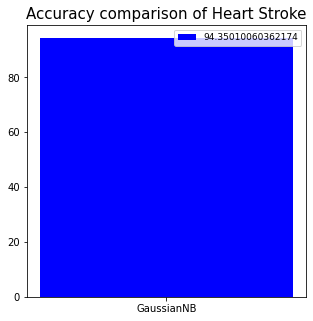

In [14]:
graph()

In [15]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 57
True Negative : 44
False Positive : 6
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.88
False Positive Rate : 0.12
False Negative Rate : 0.0

Positive Predictive Value : 0.9047619047619048
Negative predictive value : 1.0


Confusion matrix-Naive Bayes:
[[44  6]
 [ 0 57]]


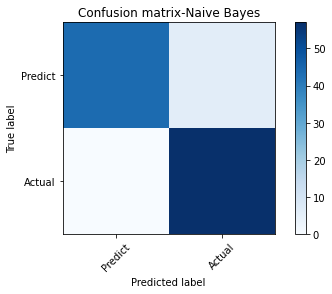

In [16]:
def plot_confusion_matrix(cm2, title='Confusion matrix-Naive Bayes', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-Naive Bayes:')
print(cm2)
plot_confusion_matrix(cm2)